After reading [this](http://www-cs-students.stanford.edu/~amitp/game-programming/polygon-map-generation/) post on [Red Blob Games](http://www-cs-students.stanford.edu/~amitp/game-programming/polygon-map-generation/), I decided to give my own map generator a go. I used python and matplotlib to replicate some of the ideas demonstrated in the article and continued building from there. 

## Starting with some (N) random points

I'm going to construct a Voronoi diagram in a similiar way as done in the original article[^rblob1], minus the relaxation (I hope to get some more 'chaotic' terrain). I'm using the Voronoi implementation in Scipy[^scipyvoronoi].

[^rblob1]: [Polygon Generation from Voronoi Diagrams](http://www-cs-students.stanford.edu/~amitp/game-programming/polygon-map-generation/#polygons)

[^scipyvoronoi]: [scipy.spatial.Voronoi](http://scipy.github.io/devdocs/generated/scipy.spatial.Voronoi.html)

<IPython.core.display.Javascript object>


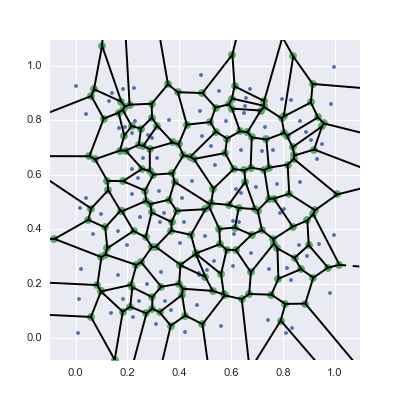

In [2]:
#ignore
seed = 55555
np.random.seed(seed)
N = 100
# x, y coordinate pairs
pts = np.random.rand(N,2)
vor = Voronoi(pts)
voronoi_plot_2d(vor)
plt.show()

Amit on RedBlob subdivides the original polygons to make them more noisy, which, I presume, is why relaxes his original points to produce less varience in areas. I tried subdividing and fuzzing the edges in a similiar manner, but had some trouble rendering it out in matplotlib (it's not exactly meant for this sort of thing after all). I found I could get similiar results simply by increasing the number of polygons and I could also have finer representation of the map. There's only 500 polygons in the example above, though I'm going to use 5000 for the rest of the article.

## Determining Biomes and Coloring

To start filling in the Voronoi cells, I first define some different biome reigions using a sort of Whittaker classification, although I'll use two dimensionless, normalized variables (I'll call them height and humidity) in place of precipitation and temperature. I also map each biome onto its own hex color to use when coloring in the map. These are highly tunable parameters and could be further subdivided to give more variety in the results. Here is the color mapping I'm using for the various biomes:

<IPython.core.display.Javascript object>


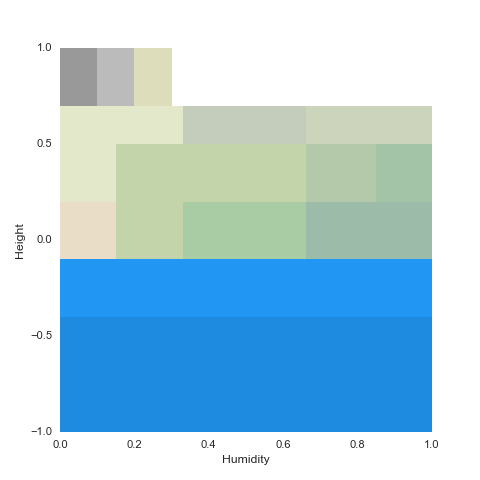

In [8]:
#ignore
plt.figure(figsize=(6,6))
{-0.4 : { 1.0 : "deep_sea" },
                -0.1: { 1.0 : "sea" },
                0.2 : { 0.15 : "trop_desert", 0.33 : "grassland", 0.66 : "trop_forest", 1.0 : "trop_rain_forest" },
                0.5 : { 0.15 : "desert", 0.66 : "grassland", 0.85 : "forest", 1.0 : "rain_forest" },
                0.7 : { 0.33 : "desert", 0.66: "shrubland", 1.0 : "taiga" },
                1.0 : { 0.1 : "scorched", 0.2 : "bare", 0.3 : "tundra", 1.0 : "snow" }
               }

p = Polygon([ [-1.0, -1.0], [-1.0, -0.4], [1.0, -0.4], [1.0, -1.0]], facecolor=biome_colors['deep_sea'],edgecolor='none')
plt.gca().add_patch(p)


p = Polygon([ [-1.0, -0.4], [-1.0, -0.1], [1.0, -0.1], [1.0, -0.4]], facecolor=biome_colors['sea'], edgecolor='none')
plt.gca().add_patch(p)

p = Polygon([ [0.0, -0.1], [0.0, 0.2], [0.15, 0.2], [0.15, -0.1]], facecolor=biome_colors['trop_desert'], edgecolor='none')
plt.gca().add_patch(p)

p = Polygon([ [0.15, -0.1], [0.15, 0.2], [0.33, 0.2], [0.33, -0.1]], facecolor=biome_colors['grassland'], edgecolor='none')
plt.gca().add_patch(p)

p = Polygon([ [0.66, -0.1], [0.66, 0.2], [0.33, 0.2], [0.33, -0.1]], facecolor=biome_colors['trop_forest'], edgecolor='none')
plt.gca().add_patch(p)

p = Polygon([ [1.0, -0.1], [1.0, 0.2], [0.66, 0.2], [0.66, -0.1]], facecolor=biome_colors['trop_rain_forest'], edgecolor='none')
plt.gca().add_patch(p)

p = Polygon([ [0.0, 0.2], [0.0, 0.5], [0.15, 0.5], [0.15, 0.2]], facecolor=biome_colors['desert'], edgecolor='none')
plt.gca().add_patch(p)

p = Polygon([ [0.15, 0.2], [0.15, 0.5], [0.66, 0.5], [0.66, 0.2]], facecolor=biome_colors['grassland'], edgecolor='none')
plt.gca().add_patch(p)


p = Polygon([ [0.66, 0.2], [0.66, 0.5], [0.85, 0.5], [0.85, 0.2]], facecolor=biome_colors['forest'], edgecolor='none')
plt.gca().add_patch(p)


p = Polygon([ [0.85, 0.2], [0.85, 0.5], [1.0, 0.5], [1.0, 0.2]], facecolor=biome_colors['rain_forest'], edgecolor='none')
plt.gca().add_patch(p)


p = Polygon([ [0.0, 0.5], [0.0, 0.7], [0.33, 0.7], [0.33, 0.5]], facecolor=biome_colors['desert'], edgecolor='none')
plt.gca().add_patch(p)

p = Polygon([ [0.33, 0.5], [0.33, 0.7], [0.66, 0.7], [0.66, 0.5]], facecolor=biome_colors['shrubland'], edgecolor='none')
plt.gca().add_patch(p)

p = Polygon([ [0.66, 0.5], [0.66, 0.7], [1.0, 0.7], [1.0, 0.5]], facecolor=biome_colors['taiga'], edgecolor='none')
plt.gca().add_patch(p)

p = Polygon([ [0.0, 0.7], [0.0, 1.0], [0.1, 1.0], [0.1, 0.7]], facecolor=biome_colors['scorched'], edgecolor='none')
plt.gca().add_patch(p)

p = Polygon([ [0.1, 0.7], [0.1, 1.0], [0.2, 1.0], [0.2, 0.7]], facecolor=biome_colors['bare'], edgecolor='none')
plt.gca().add_patch(p)

p = Polygon([ [0.2, 0.7], [0.2, 1.0], [0.3, 1.0], [0.3, 0.7]], facecolor=biome_colors['tundra'], edgecolor='none')
plt.gca().add_patch(p)

p = Polygon([ [0.3, 0.7], [0.3, 1.0], [1.0, 1.0], [1.0, 0.7]], facecolor=biome_colors['snow'], edgecolor='none')
plt.gca().add_patch(p)

plt.xlabel('Humidity')
plt.ylabel('Height')

plt.xlim(0.0, 1.0)
plt.ylim(-1.0, 1.0)
plt.show()

To determine these two variables, I use two perlin noise maps. I use differnt scaling parameters for the humidity and the height and found that scaling the humidity to about twice the height gives nice results. However, this can vary a lot depending on the feature size that is desired. Here I show the two noise maps and how they combine to produce biomes.

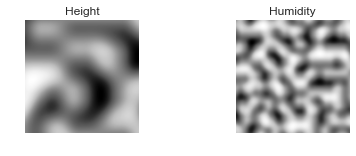

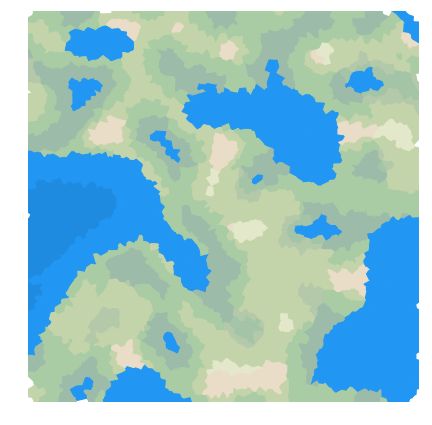

In [10]:
#ignore
noise_seed = seed #116
htscale = 3.0
humscale = 8.0
pan = [ 0.5, 0.0 ]

for b in biomes.values():
    b.assign_biome(noise_seed, htscale, humscale, pan, False)

plt.subplot(2,2,1)
H = pnoise(mesh[0]*htscale+pan[0], mesh[1]*htscale+pan[1], noise_seed)
plt.imshow(np.flipud(H))
plt.title('Height')
plt.axis('off')

plt.subplot(2,2,2)
H = pnoise(mesh[0]*humscale+pan[0], mesh[1]*humscale+pan[1], noise_seed+1)
plt.title('Humidity')
plt.imshow(np.flipud(H))
plt.axis('off')
plt.tight_layout()

plt.figure(figsize=(7,7))
draw_biomes(biomes)
plt.gca().set_aspect(1)

plt.axis('off')
plt.show()

I can also turn it into closed landforms (islands) by applying a radial fourth order drop-off.

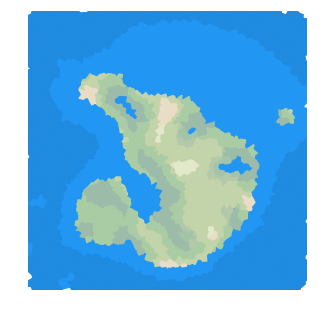

In [11]:
#ignore
for b in biomes.values():
    b.assign_biome(noise_seed, htscale, humscale, pan, True)

plt.figure(figsize=(5,5))
draw_biomes(biomes)
plt.gca().set_aspect(1)

plt.axis('off')
plt.show()

These are the results of just some minor tweaking of the biome mappings and color choices. 

## Adding Cities

Now that there's a relatively nice looking topology, I'll throw in some cities and provinces. I choose biome regions at random place cities according to a distribution that I've come up with (cities aren't as likely to be on the top of a mountain as they are to be on a flat plain). Here's that distribution as a probability as a function of the biome type:

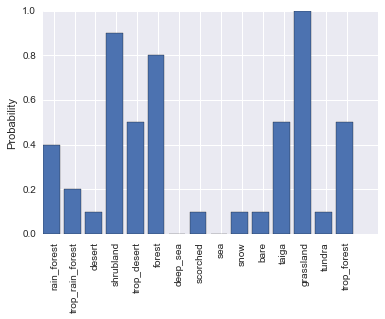

In [13]:
#ignore
x = np.arange(0,len(city_probs.keys()))
plt.bar(x, list(city_probs.values()))
plt.xticks(x+0.5, list(city_probs.keys()), rotation=90)
plt.ylabel('Probability')
plt.show()

I needed to cherry pick the seed to find something that didn't clump up the city locations too much. This would have been a good time to use relaxation. Here's my island with some cities placed on it (I'm using random names from a list compiled by [Google](https://developers.google.com/adwords/api/docs/appendix/geotargeting?csw=1)):

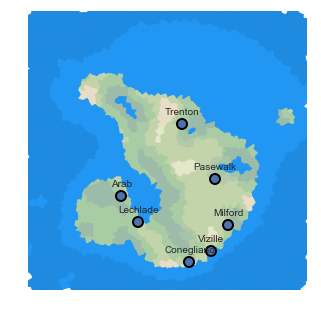

In [22]:
#ignore
for b in biomes.values():
    b.assign_biome(noise_seed, htscale, humscale, pan, True)

plt.figure(figsize=(5,5))

draw_biomes(biomes)
draw_cities(cities)

plt.gca().set_aspect(1)
plt.axis('off')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

## Roads

Next, I'll connect the cities with roads. This could be useful for modeling trade or movement between cities in a game or simulation. The underlying graph structure of the map makes it very easy to do path finding. I'm using a basic breadth-first-search weighted by height variations, though a more intricate model might also cosider the biome type and the euclidean distances. I can play with the maximum depth of the tree modify the density of roads. Here are two examples with two different depths demonstrating that:

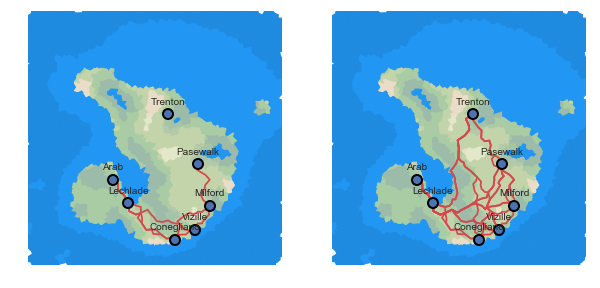

In [27]:
#ignore
#plt.figure(figsize=(5,10))
plt.subplot(1,2,1)
draw_biomes(biomes)
for i in range(len(cities)):
    for j in range(i):
        start = list(cities.values())[i].biomes[0]
        goal = list(cities.values())[j].biomes[0]
        r = road_to(start, goal, biomes, 600)
        if r:
            list(cities.values())[i].roads.append(r)
            list(cities.values())[j].roads.append(r)
            draw_road(r)         

draw_cities(cities)

plt.gca().set_aspect(1)
plt.axis('off')
plt.xlim(0,1)
plt.ylim(0,1)

plt.subplot(1,2,2)
draw_biomes(biomes)
for i in range(len(cities)):
    for j in range(i):
        start = list(cities.values())[i].biomes[0]
        goal = list(cities.values())[j].biomes[0]
        r = road_to(start, goal, biomes, 1200)
        if r:
            list(cities.values())[i].roads.append(r)
            list(cities.values())[j].roads.append(r)
            draw_road(r)

draw_cities(cities)
            
plt.gca().set_aspect(1)
plt.axis('off')
plt.xlim(0,1)
plt.ylim(0,1)
plt.gcf().set_size_inches((10,5))
plt.show()

## Political Regions

Political regions and area of influence is important for any sort of political or economic model. To assign regions, I started at every city (capital) and grew them outward simultaneously. This whole process could be repeated any number of times to get the desired depth and complexity. For provinces within regions, non-capital cities could be placed, roads layed, and ownership assigned by extending from each city. Repeat again for towns, individual land, and so on. 

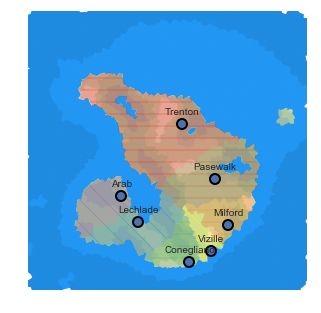

In [29]:
#ignore
plt.figure(figsize=(5,5))

draw_biomes(biomes)
draw_provinces(cities)
draw_cities(cities)
plt.gca().set_aspect(1)
plt.axis('off')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

## Further Work

My main intention was to create some visually appealing and realistic maps, which I was able to do pretty well. It could use some basic lighting which wouldn't be too hard, though if I wanted to improve it any more, I should probably to move to something other than matplotlib. Matplotlib is great, but this is hardly what it's meant to do. 

Adding to the economics a politics also has a lot of posibilities, depending on what the use case was. Adding resources like ore, animals, and oil would be just a matter of adding more noise maps. If the goal was to have an econimicaly fair gameboard, asigning regions first based on economic value would be better than around randomly place cities. To create political organization on lower or higher levels would mean repeating the steps I've already done on different scales. 